In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
np.random.seed(0)
centroids = [[3,3], [-3, -2], [2, -3], [0, 0]]
x,y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

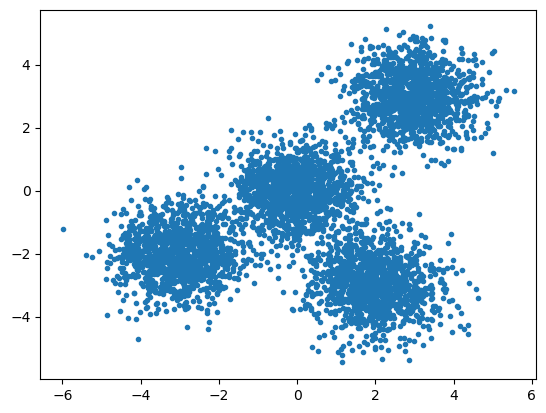

In [5]:
plt.scatter(x[:, 0], x[:,1], marker='.')
plt.show()

## Kmeans
`KMeans` function in Python's scikit-learn library is used for performing K-means clustering. It accepts the following parameters:

- `init`: The method for initializing centroids. It can take two values: `k-means++` or `random`.
- `n_clusters`: The number of clusters to form.
- `n_init`: The number of times the algorithm will be run with different centroid seeds. The final results will be the best output of `n_init` consecutive runs in terms of inertia.

Here's a brief explanation of each parameter:

- `init`: This parameter determines the method used for initializing the cluster centroids before the K-means clustering process begins. 
  - If set to `'k-means++'`, the algorithm will use the k-means++ method to initialize centroids. This method selects initial cluster centers in a way that increases the likelihood of a good final solution.
  - If set to `'random'`, the algorithm will randomly choose observations from the dataset as initial centroids.
  
- `n_clusters`: This parameter specifies the number of clusters the algorithm should divide the dataset into.

- `n_init`: This parameter specifies the number of times the K-means algorithm will be run with different centroid seeds. The final model will be the best output of `n_init` consecutive runs in terms of inertia, which is the sum of squared distances of samples to their closest cluster center.

You can find more information about other parameters and detailed explanations in the official documentation: [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [6]:
k_means = KMeans(init = 'random', n_clusters = 4, n_init = 15)

In [7]:
k_means.fit(x)

KMeans(init='random', n_clusters=4, n_init=15)

In [8]:
k_means.labels_

array([3, 1, 1, ..., 2, 3, 3])

In [9]:
k_means.cluster_centers_

array([[-3.05006801e-02,  1.12353254e-03],
       [ 1.99348887e+00, -3.01067931e+00],
       [ 2.97795387e+00,  2.99317691e+00],
       [-3.01979724e+00, -1.99489798e+00]])

In [10]:
print(np.round(k_means.cluster_centers_))

[[-0.  0.]
 [ 2. -3.]
 [ 3.  3.]
 [-3. -2.]]


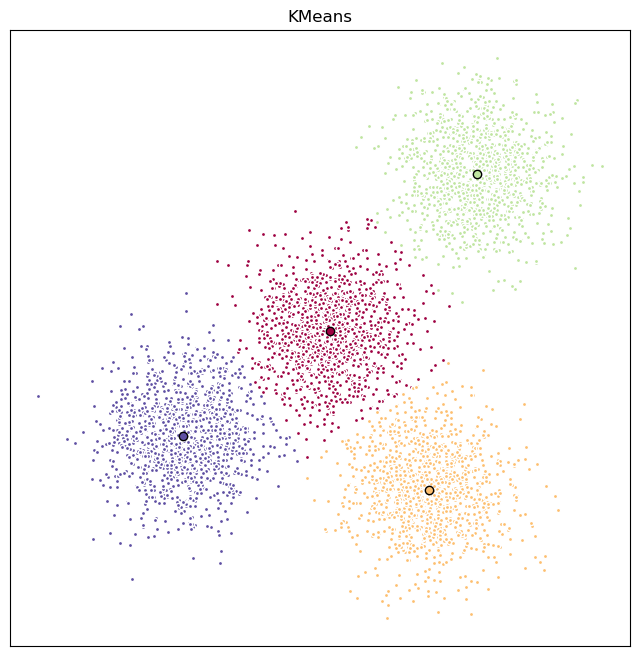

In [13]:
# Graph
fig = plt.figure(figsize=(8, 8))
# Different color for every cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
